# University Admissions in Turkey (2019–2024)
## Scholarship level, score type, and demand per quota

### Problem topic
This notebook explores how **scholarship type** (e.g., Ücretsiz, Burslu, %50 İndirimli, Ücretli) and **score type**
(SAY, EA, SÖZ, DİL, TYT) relate to **demand per quota** across Turkish university programs from 2019–2024.

### Central question
How has **demand per quota** evolved over time by scholarship level, and do these patterns differ across score types and regions (cities)?

### Dataset overview
Each row represents a **university program in a specific year**. The dataset includes:
- program identifiers (`program_code`)
- program context (`university_name`, `department_name`, `faculty_name`, `city`, `university_type`)
- admissions demand & outcomes (`total_preferences`, `demand_per_quota`, `placed_count`, `initial_placement_rate`)
- scoring competitiveness (`final_score_012`, `final_rank_012`, `final_score_018`, `final_rank_018`)
- student composition (`male`, `female`)
- scholarship categories (`scholarship_type`)
- score category (`score_type`)


This is the assignment file for Statistics module Everything Counts at LIS. Student Number 25000148737, Full-Time MASc 2025.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
print(pd)

<module 'pandas' from '/opt/anaconda3/lib/python3.13/site-packages/pandas/__init__.py'>


In [8]:
df = pd.read_csv("01_university_admissions_turkey_2019_2024.csv")
df.head()

,program_code,year,university_name,city,university_type,department_name,faculty_name,score_type,scholarship_type,is_undergraduate,...,top_9_pref_count,placed_count,placed_pref_rank_avg,placed_top_1_pref_count,placed_top_3_pref_count,placed_top_10_pref_count,placed_pref_uni_devlet_count,placed_pref_uni_vakif_count,placed_pref_uni_kktc_count,placed_pref_uni_yurt_disi_count
0,106510077,2019,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,True,...,310,62,6.2,10,22,49,802,80,4,2
1,106510077,2020,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,True,...,655,72,7.0,11,19,58,892,109,4,0
2,106510077,2021,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,True,...,655,72,7.1,15,22,54,946,93,5,0
3,106510077,2022,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,True,...,1011,77,7.2,12,21,57,913,104,0,0
4,106510077,2023,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,True,...,714,77,6.5,16,25,61,1090,66,0,0


## Initial structure check
After loading that data, I checked the size, variable types and more to understand the contects better like:
- what one row represents
- which columns are numeric vs categorical
- any immediate cleaning needs

In [9]:
print("Shape:", df.shape)
display(df.info())
display(df.describe(include="all").T)


Shape: (128352, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128352 entries, 0 to 128351
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   program_code                     128352 non-null  int64  
 1   year                             128352 non-null  int64  
 2   university_name                  128352 non-null  object 
 3   city                             128352 non-null  object 
 4   university_type                  128352 non-null  object 
 5   department_name                  128352 non-null  object 
 6   faculty_name                     127475 non-null  object 
 7   score_type                       128352 non-null  object 
 8   scholarship_type                 128352 non-null  object 
 9   is_undergraduate                 128352 non-null  bool   
 10  all_tags                         70270 non-null   object 
 11  total_quota                      128352 non-n

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
program_code,128352.0,NaN,NaN,NaN,154556522.746229,61566249.772242,100110018.0,104950236.0,110210339.0,203490336.75,409610832.0
year,128352.0,NaN,NaN,NaN,2021.500569,1.715442,2019.0,2020.0,2022.0,2023.0,2024.0
university_name,128352,235,İSTANBUL GELİŞİM ÜNİVERSİTESİ,2251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,128352,82,İSTANBUL,39416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
university_type,128352,4,devlet,73074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department_name,128352,733,Bilgisayar Programcılığı,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
faculty_name,127475,1131,Sağlık Hizmetleri Meslek Yüksekokulu,10825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score_type,128352,5,TYT,60030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scholarship_type,128352,10,Ücretsiz,63799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_undergraduate,128352,2,True,68322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace(r"[^a-z0-9_]", "", regex=True)
)
df.columns


Index(['program_code', 'year', 'university_name', 'city', 'university_type',
       'department_name', 'faculty_name', 'score_type', 'scholarship_type',
       'is_undergraduate', 'all_tags', 'total_quota', 'total_enrolled', 'male',
       'female', 'final_score_012', 'final_rank_012', 'final_score_018',
       'final_rank_018', 'initial_placement_rate', 'not_registered',
       'additional_placement', 'avg_obp_012', 'avg_obp_018',
       'total_preferences', 'demand_per_quota', 'avg_preference_rank',
       'top_1_pref_count', 'top_3_pref_count', 'top_9_pref_count',
       'placed_count', 'placed_pref_rank_avg', 'placed_top_1_pref_count',
       'placed_top_3_pref_count', 'placed_top_10_pref_count',
       'placed_pref_uni_devlet_count', 'placed_pref_uni_vakif_count',
       'placed_pref_uni_kktc_count', 'placed_pref_uni_yurt_disi_count'],
      dtype='object')

In [11]:
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df) * 100).sort_values(ascending=False)

missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

display(missing_table)


,missing_count,missing_pct
final_rank_018,79162,61.675704
final_score_018,78199,60.925424
avg_obp_018,61090,47.595674
all_tags,58082,45.252119
final_rank_012,14236,11.091374
final_score_012,12870,10.027113
avg_obp_012,4125,3.213818
placed_pref_rank_avg,3989,3.107860
faculty_name,877,0.683277
total_enrolled,0,0.000000


## Data cleaning decisions (to update)

Use the missingness table and checks below to document:

1. **High-missing columns**  
   - Which columns are heavily missing: final_score_018 , final_rank_018 , avg_obp_018  all_tags
   - Are they missing in certain years only: 

2. **Duplicates**  
   - Are there repeated program-year rows?

3. **Type fixes**  
   - Any numeric columns read as strings?
   - Any date-like fields to parse? (not required here)

4. **Outliers / impossible values**  
   - E.g., demand_per_quota = 0, placement_rate > 100, huge quotas.
   - Decide whether they're valid edge cases or data errors.

TODO: Write bullet explanations with “issue → fix → justification → impact”.


In [13]:
dup_rows = df.duplicated().sum()
print("Duplicate rows:", dup_rows)

# Note: If you decide duplicates are errors: df = df.drop_duplicates()


Duplicate rows: 0


In [14]:
core_cols = [
    "program_code","year","university_name","city","university_type",
    "department_name","faculty_name","score_type","scholarship_type",
    "total_quota","total_enrolled","total_preferences","demand_per_quota",
    "initial_placement_rate","placed_count",
    "final_score_012","final_rank_012","final_score_018","final_rank_018",
    "male","female"
]

df_core = df[core_cols].copy()
df_core.head()


,program_code,year,university_name,city,university_type,department_name,faculty_name,score_type,scholarship_type,total_quota,...,total_preferences,demand_per_quota,initial_placement_rate,placed_count,final_score_012,final_rank_012,final_score_018,final_rank_018,male,female
0,106510077,2019,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,62,...,471,7.6,100.0,62,433.29704,40724.0,NaN,NaN,46,16
1,106510077,2020,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,72,...,959,13.3,100.0,72,461.36797,44794.0,NaN,NaN,59,13
2,106510077,2021,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,72,...,997,13.8,100.0,72,397.93665,45263.0,NaN,NaN,47,25
3,106510077,2022,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,77,...,1534,19.9,100.0,77,469.42657,40125.0,NaN,NaN,58,19
4,106510077,2023,ABDULLAH GÜL ÜNİVERSİTESİ,KAYSERİ,devlet,Bilgisayar Mühendisliği,Mühendislik Fakültesi,SAY,Ücretsiz,77,...,1099,14.3,100.0,77,471.55314,39283.0,NaN,NaN,60,17


## Descriptive statistics: numeric variables

Focus especially on:
- **demand_per_quota** (main outcome)
- **total_preferences** and **total_quota**
- **initial_placement_rate**
- **final_score_012 / final_rank_012** (as a competitiveness proxy)
- **male / female** (composition of students)

Interpretation:
- Is demand_per_quota typically low or high? Wide spread or tight?
- Are distributions skewed (long right tail)?
- What do extreme outliers represent (elite programs?) 


In [15]:
num_df = df_core.select_dtypes(include=np.number)

desc = num_df.describe().T
desc["skew"] = num_df.skew(numeric_only=True)
desc["kurtosis"] = num_df.kurtosis(numeric_only=True)

display(desc)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
program_code,128352.0,1.545565e+08,6.156625e+07,1.001100e+08,1.049502e+08,1.102103e+08,2.034903e+08,4.096108e+08,1.019335,0.701689
year,128352.0,2.021501e+03,1.715442e+00,2.019000e+03,2.020000e+03,2.022000e+03,2.023000e+03,2.024000e+03,-0.013394,-1.276594
total_quota,128352.0,4.748979e+01,1.619614e+02,0.000000e+00,1.300000e+01,4.000000e+01,6.200000e+01,1.845000e+04,53.523161,4508.934284
total_enrolled,128352.0,4.455723e+01,1.547833e+02,0.000000e+00,1.000000e+01,3.400000e+01,6.200000e+01,1.522600e+04,51.451792,4132.638783
total_preferences,128352.0,8.777020e+02,3.528987e+03,0.000000e+00,1.410000e+02,3.830000e+02,9.510000e+02,2.330120e+05,26.954756,985.080178
demand_per_quota,128352.0,1.874438e+01,2.171120e+01,0.000000e+00,6.600000e+00,1.400000e+01,2.400000e+01,9.340000e+02,7.485025,147.264198
initial_placement_rate,128352.0,8.922572e+01,2.637303e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.286000e+02,-2.471717,4.709673
placed_count,128352.0,4.438683e+01,1.548041e+02,0.000000e+00,9.000000e+00,3.300000e+01,6.200000e+01,1.522600e+04,48.798134,3777.388476
final_score_012,115482.0,2.913568e+02,6.982880e+01,1.383854e+02,2.386268e+02,2.768995e+02,3.282063e+02,5.554201e+02,0.950506,0.605845
final_rank_012,114116.0,7.566999e+05,6.468492e+05,1.800000e+01,2.057695e+05,5.741555e+05,1.238921e+06,2.911151e+06,0.774089,-0.359547


## Descriptive statistics: categorical variables

Key categories for the main question:
- scholarship_type (Ücretsiz, Burslu, Ücretli, %50 İndirimli, etc.)
- score_type (SAY, EA, SÖZ, DİL, TYT)
- university_type (devlet vs vakıf etc.)
- city

Interpretations:
- Which scholarship types dominate the dataset? Any very small categories?
- Is the distribution of score types balanced or lopsided?
- Any categories that look messy / redundant?


In [16]:
cat_cols = df_core.select_dtypes(exclude=np.number).columns

for col in cat_cols:
    print(f"\n--- {col} ---")
    display(df_core[col].value_counts(dropna=False).head(15))
    display(df_core[col].value_counts(normalize=True, dropna=False).head(15))



--- university_name ---


university_name
İSTANBUL GELİŞİM ÜNİVERSİTESİ      2251
İSTANBUL AYDIN ÜNİVERSİTESİ        2109
İSTANBUL NİŞANTAŞI ÜNİVERSİTESİ    1960
İSTANBUL MEDİPOL ÜNİVERSİTESİ      1902
İSTANBUL BEYKENT ÜNİVERSİTESİ      1755
BAŞKENT ÜNİVERSİTESİ               1730
SELÇUK ÜNİVERSİTESİ                1534
ATATÜRK ÜNİVERSİTESİ               1469
AKDENİZ ÜNİVERSİTESİ               1382
İSTANBUL AREL ÜNİVERSİTESİ         1377
ÜSKÜDAR ÜNİVERSİTESİ               1355
DOĞU AKDENİZ ÜNİVERSİTESİ          1310
İSTANBUL OKAN ÜNİVERSİTESİ         1256
YAKIN DOĞU ÜNİVERSİTESİ            1254
BURSA ULUDAĞ ÜNİVERSİTESİ          1251
Name: count, dtype: int64

university_name
İSTANBUL GELİŞİM ÜNİVERSİTESİ      0.017538
İSTANBUL AYDIN ÜNİVERSİTESİ        0.016431
İSTANBUL NİŞANTAŞI ÜNİVERSİTESİ    0.015271
İSTANBUL MEDİPOL ÜNİVERSİTESİ      0.014819
İSTANBUL BEYKENT ÜNİVERSİTESİ      0.013673
BAŞKENT ÜNİVERSİTESİ               0.013479
SELÇUK ÜNİVERSİTESİ                0.011952
ATATÜRK ÜNİVERSİTESİ               0.011445
AKDENİZ ÜNİVERSİTESİ               0.010767
İSTANBUL AREL ÜNİVERSİTESİ         0.010728
ÜSKÜDAR ÜNİVERSİTESİ               0.010557
DOĞU AKDENİZ ÜNİVERSİTESİ          0.010206
İSTANBUL OKAN ÜNİVERSİTESİ         0.009786
YAKIN DOĞU ÜNİVERSİTESİ            0.009770
BURSA ULUDAĞ ÜNİVERSİTESİ          0.009747
Name: proportion, dtype: float64


--- city ---


city
İSTANBUL     39416
ANKARA        9889
YURTDIŞI      7623
İZMİR         4545
KONYA         3323
ANTALYA       2545
MERSİN        1698
KOCAELİ       1678
GAZİANTEP     1604
ERZURUM       1583
BURSA         1518
TRABZON       1457
ISPARTA       1420
ESKİŞEHİR     1417
KAYSERİ       1406
Name: count, dtype: int64

city
İSTANBUL     0.307093
ANKARA       0.077046
YURTDIŞI     0.059391
İZMİR        0.035410
KONYA        0.025890
ANTALYA      0.019828
MERSİN       0.013229
KOCAELİ      0.013073
GAZİANTEP    0.012497
ERZURUM      0.012333
BURSA        0.011827
TRABZON      0.011352
ISPARTA      0.011063
ESKİŞEHİR    0.011040
KAYSERİ      0.010954
Name: proportion, dtype: float64


--- university_type ---


university_type
devlet       73074
vakif        47655
kktc          6897
yurt_disi      726
Name: count, dtype: int64

university_type
devlet       0.569325
vakif        0.371284
kktc         0.053735
yurt_disi    0.005656
Name: proportion, dtype: float64


--- department_name ---


department_name
Bilgisayar Programcılığı            2388
Çocuk Gelişimi                      2296
Psikoloji                           2008
İlk ve Acil Yardım                  1982
İşletme                             1950
Bilgisayar Mühendisliği             1787
Hemşirelik                          1583
Elektrik-Elektronik Mühendisliği    1579
Muhasebe ve Vergi Uygulamaları      1549
Bankacılık ve Sigortacılık          1547
Anestezi                            1387
Tıbbi Görüntüleme Teknikleri        1383
Tıbbi Laboratuvar Teknikleri        1370
Tıp                                 1359
Mimarlık                            1354
Name: count, dtype: int64

department_name
Bilgisayar Programcılığı            0.018605
Çocuk Gelişimi                      0.017888
Psikoloji                           0.015644
İlk ve Acil Yardım                  0.015442
İşletme                             0.015193
Bilgisayar Mühendisliği             0.013923
Hemşirelik                          0.012333
Elektrik-Elektronik Mühendisliği    0.012302
Muhasebe ve Vergi Uygulamaları      0.012068
Bankacılık ve Sigortacılık          0.012053
Anestezi                            0.010806
Tıbbi Görüntüleme Teknikleri        0.010775
Tıbbi Laboratuvar Teknikleri        0.010674
Tıp                                 0.010588
Mimarlık                            0.010549
Name: proportion, dtype: float64


--- faculty_name ---


faculty_name
Sağlık Hizmetleri Meslek Yüksekokulu            10825
Meslek Yüksekokulu                               9502
Mühendislik Fakültesi                            6694
Sağlık Bilimleri Fakültesi                       5620
İktisadi ve İdari Bilimler Fakültesi             5436
Fen-Edebiyat Fakültesi                           4709
Eğitim Fakültesi                                 4487
Teknik Bilimler Meslek Yüksekokulu               2844
İletişim Fakültesi                               2456
Sosyal Bilimler Meslek Yüksekokulu               2401
İktisadi, İdari ve Sosyal Bilimler Fakültesi     2286
Edebiyat Fakültesi                               2213
Mühendislik ve Doğa Bilimleri Fakültesi          1998
İnsan ve Toplum Bilimleri Fakültesi              1974
Fen Fakültesi                                    1303
Name: count, dtype: int64

faculty_name
Sağlık Hizmetleri Meslek Yüksekokulu            0.084338
Meslek Yüksekokulu                              0.074031
Mühendislik Fakültesi                           0.052153
Sağlık Bilimleri Fakültesi                      0.043786
İktisadi ve İdari Bilimler Fakültesi            0.042352
Fen-Edebiyat Fakültesi                          0.036688
Eğitim Fakültesi                                0.034959
Teknik Bilimler Meslek Yüksekokulu              0.022158
İletişim Fakültesi                              0.019135
Sosyal Bilimler Meslek Yüksekokulu              0.018706
İktisadi, İdari ve Sosyal Bilimler Fakültesi    0.017810
Edebiyat Fakültesi                              0.017242
Mühendislik ve Doğa Bilimleri Fakültesi         0.015567
İnsan ve Toplum Bilimleri Fakültesi             0.015380
Fen Fakültesi                                   0.010152
Name: proportion, dtype: float64


--- score_type ---


score_type
TYT    60030
SAY    29916
EA     22245
SÖZ    12288
DİL     3873
Name: count, dtype: int64

score_type
TYT    0.467698
SAY    0.233078
EA     0.173312
SÖZ    0.095737
DİL    0.030175
Name: proportion, dtype: float64


--- scholarship_type ---


scholarship_type
Ücretsiz         63799
Burslu           21840
%50 İndirimli    18256
İÖ-Ücretli       11455
Ücretli           6930
%25 İndirimli     2385
%75 İndirimli     2006
UÖ-Ücretli         877
AÖ-Ücretli         791
UE-Ücretli          13
Name: count, dtype: int64

scholarship_type
Ücretsiz         0.497063
Burslu           0.170157
%50 İndirimli    0.142234
İÖ-Ücretli       0.089247
Ücretli          0.053992
%25 İndirimli    0.018582
%75 İndirimli    0.015629
UÖ-Ücretli       0.006833
AÖ-Ücretli       0.006163
UE-Ücretli       0.000101
Name: proportion, dtype: float64

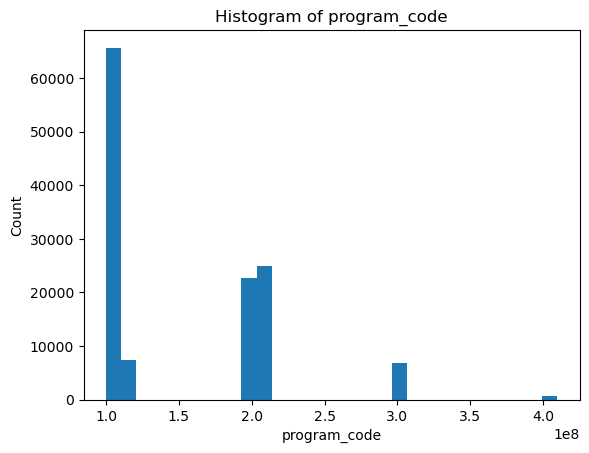

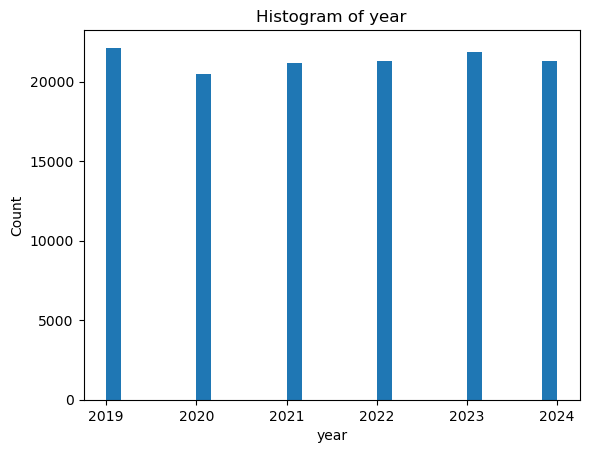

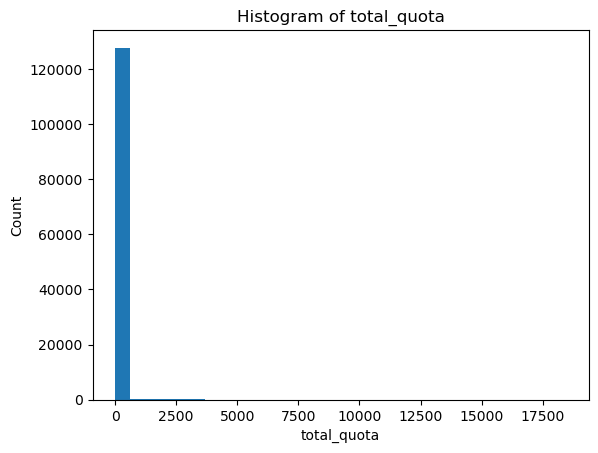

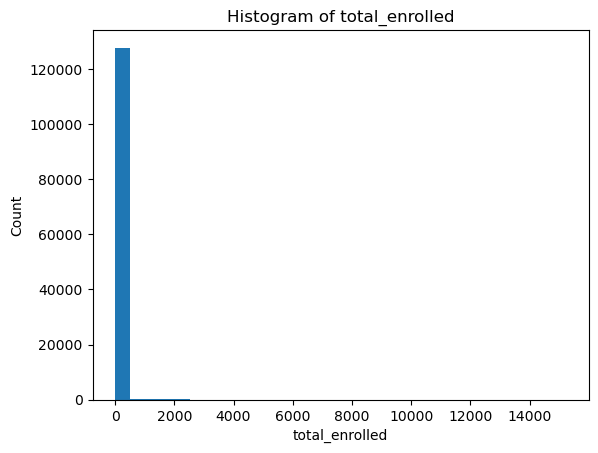

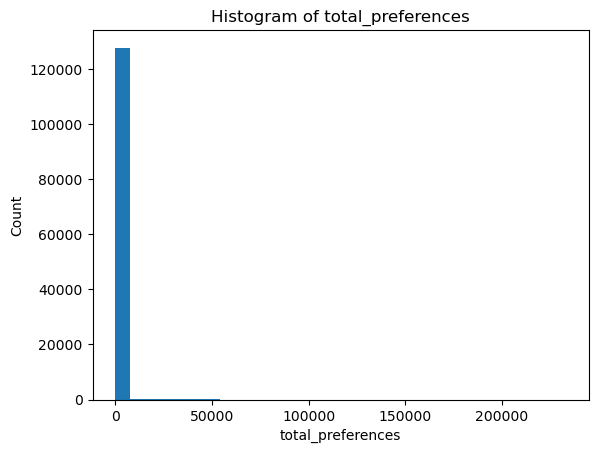

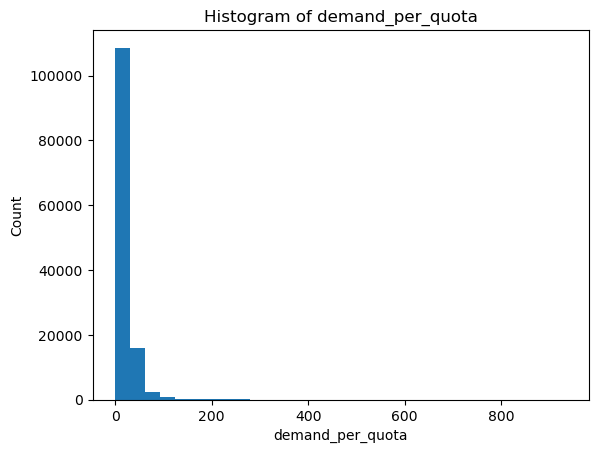

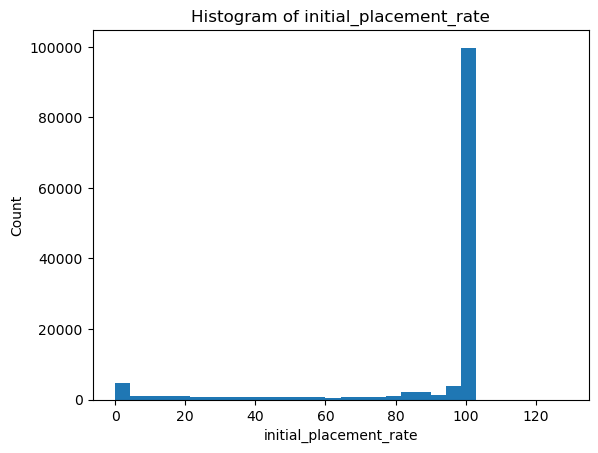

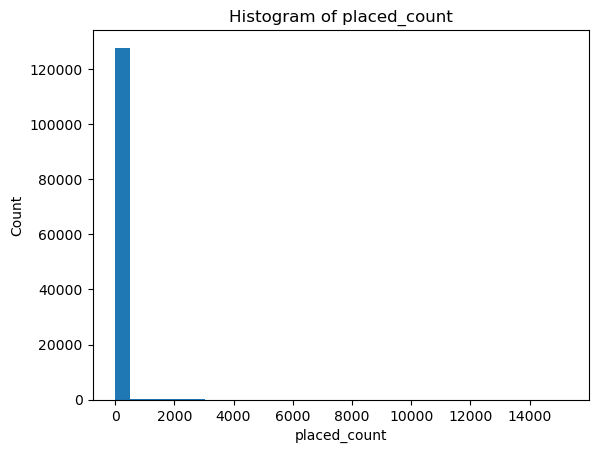

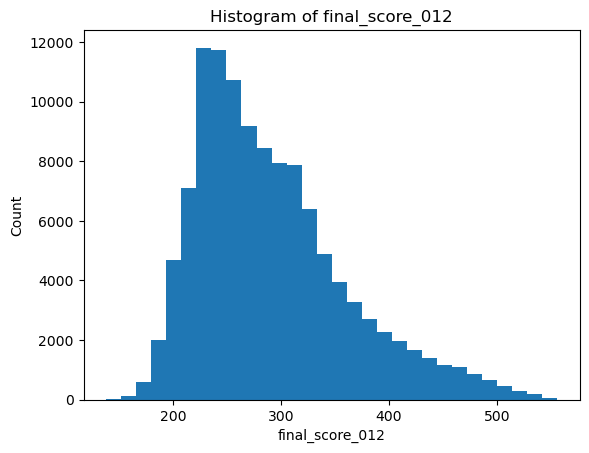

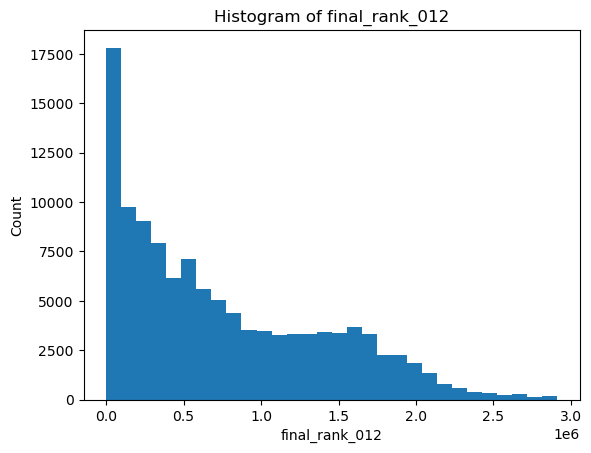

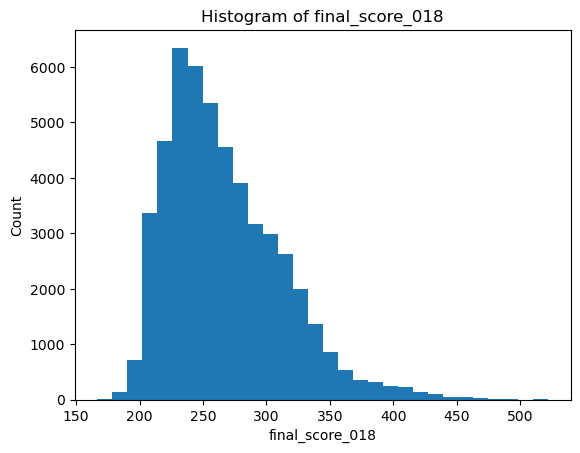

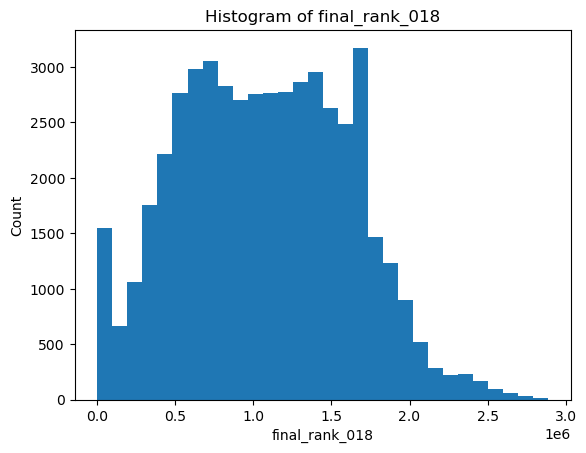

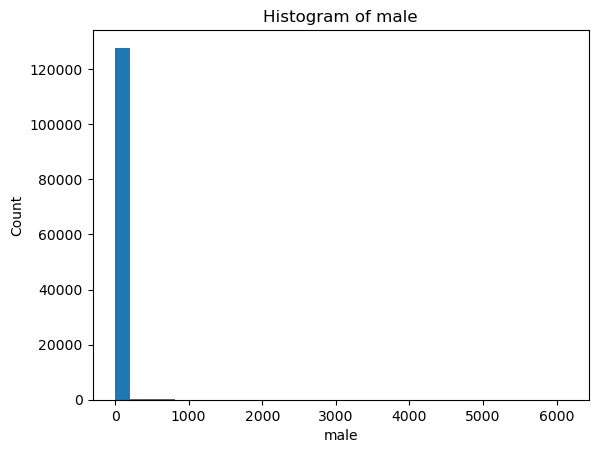

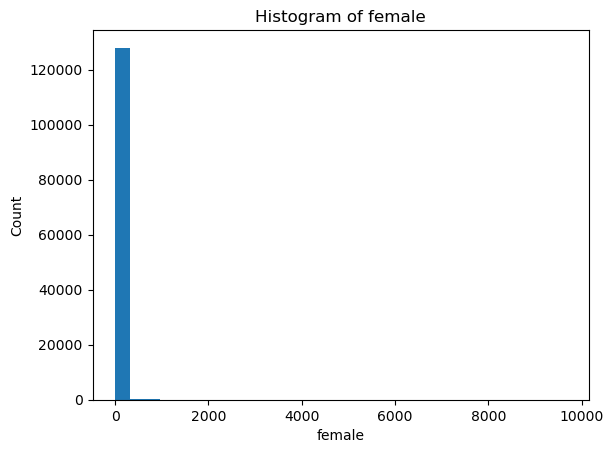

In [17]:
for col in num_df.columns:
    plt.figure()
    plt.hist(num_df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


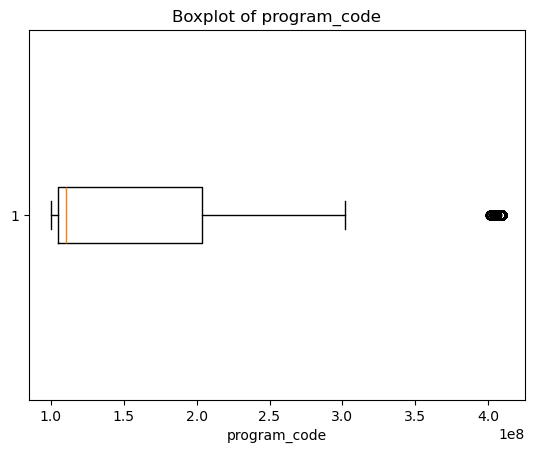

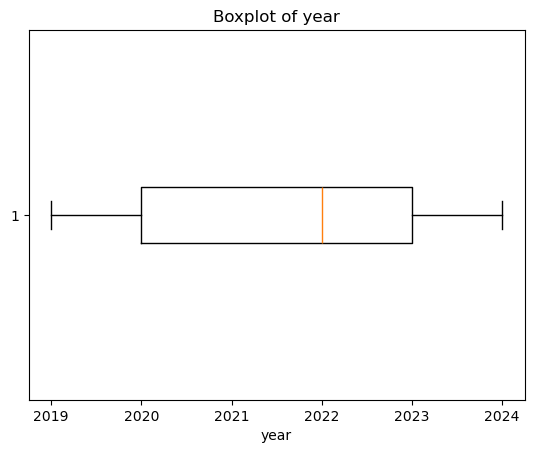

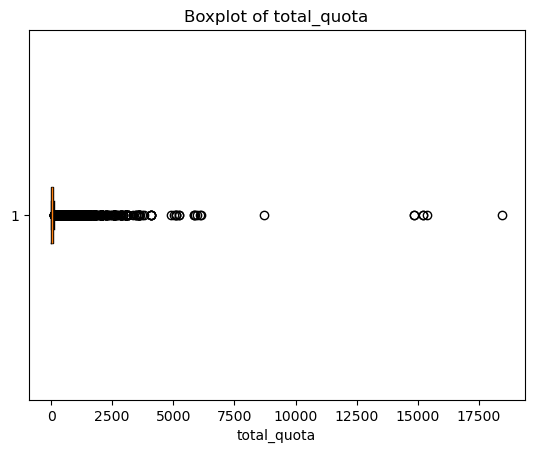

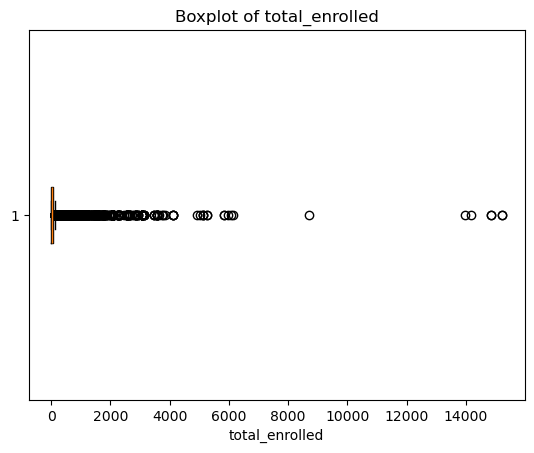

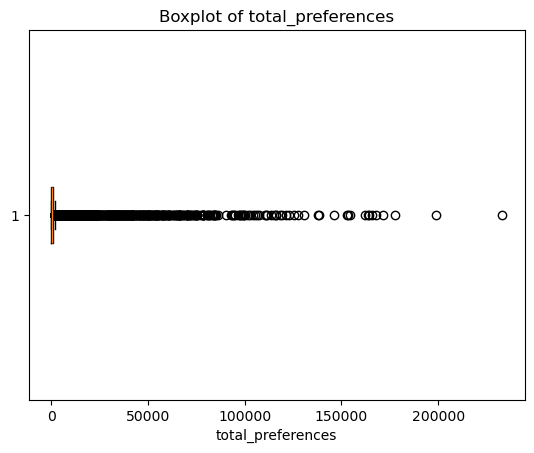

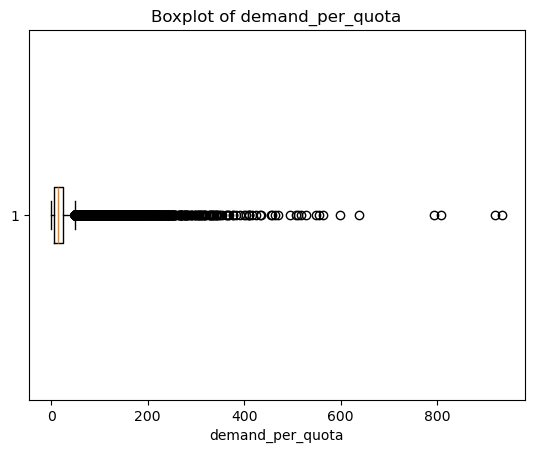

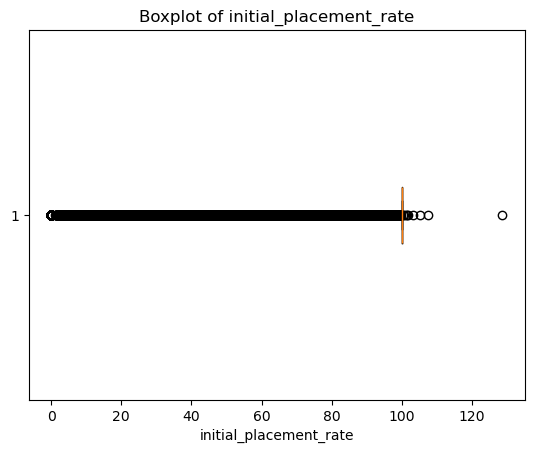

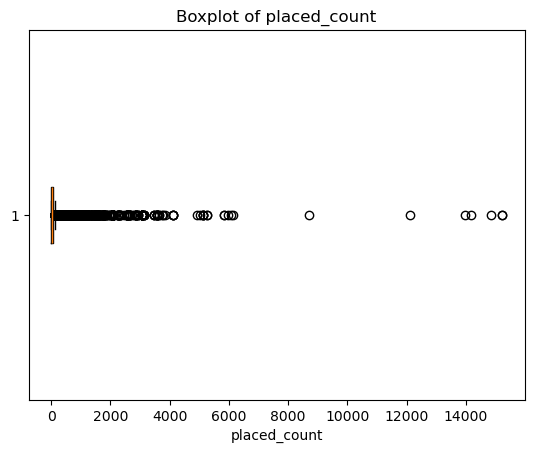

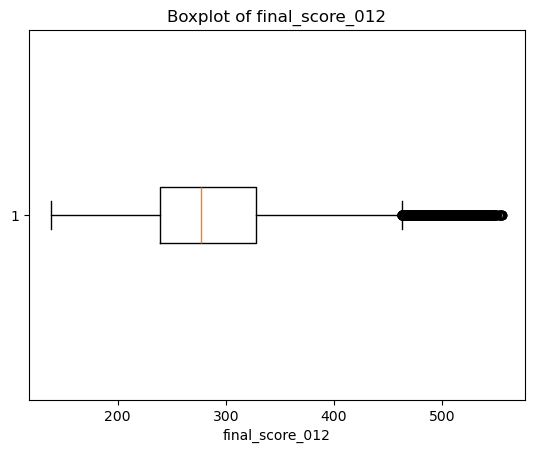

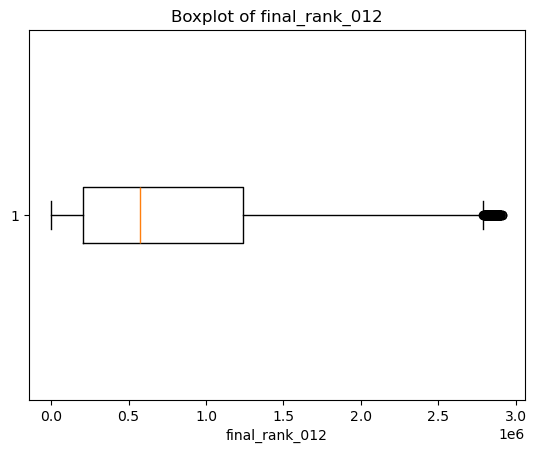

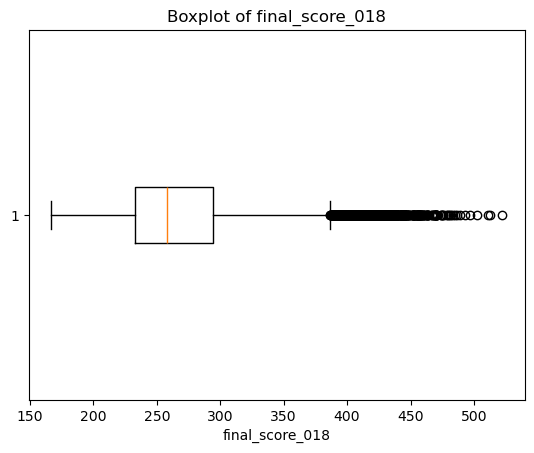

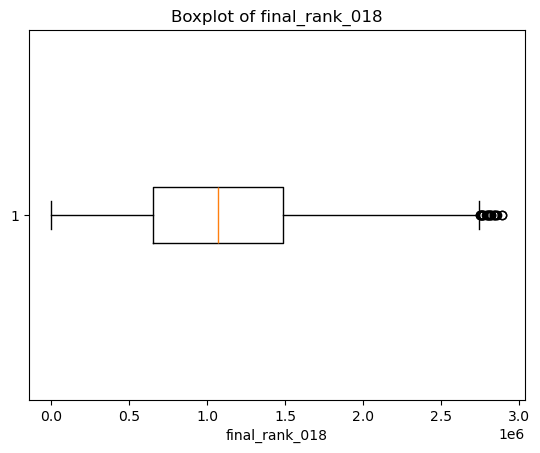

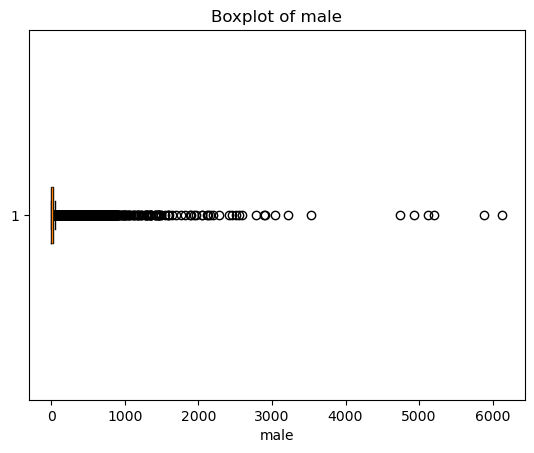

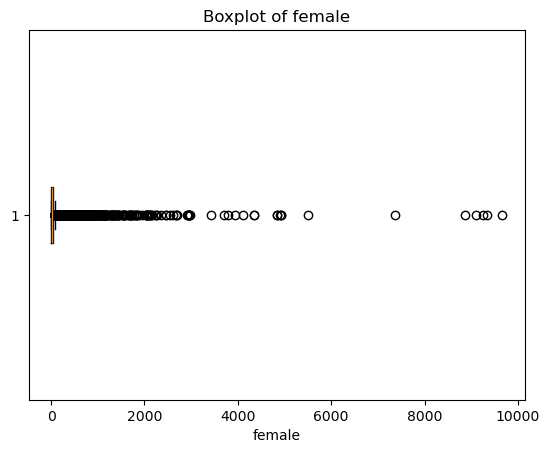

In [18]:
for col in num_df.columns:
    plt.figure()
    plt.boxplot(num_df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


## Distribution insights (fill after running)

Pick ~3 key numeric variables (must include demand_per_quota) and describe:
- Shape (normal / skewed / bimodal)
- Outliers (plausible? why?)
- What this suggests about competitiveness and student choices.

TODO: write in full sentences with evidence from the plots.


,mean,median,std,count
scholarship_type,,,,
AÖ-Ücretli,32.495828,17.2,36.191625,791
Burslu,29.659693,24.5,25.972252,21840
UÖ-Ücretli,25.396237,16.0,27.574091,877
Ücretsiz,19.430701,15.7,20.112111,63799
İÖ-Ücretli,15.906478,11.9,15.979910,11455
%75 İndirimli,15.486391,6.7,40.041231,2006
Ücretli,12.888066,5.6,24.844928,6930
%25 İndirimli,9.626122,6.4,13.278592,2385
%50 İndirimli,7.937489,5.9,10.256016,18256


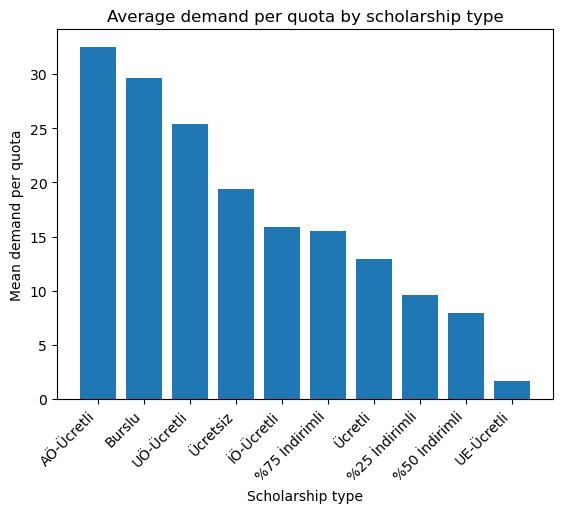

In [20]:
demand_by_sch = (
    df_core.groupby("scholarship_type")["demand_per_quota"]
    .agg(["mean","median","std","count"])
    .sort_values("mean", ascending=False)
)

display(demand_by_sch)

plt.figure()
plt.bar(demand_by_sch.index, demand_by_sch["mean"])
plt.title("Average demand per quota by scholarship type")
plt.xlabel("Scholarship type")
plt.ylabel("Mean demand per quota")
plt.xticks(rotation=45, ha="right")
plt.show()


,mean,median,std,count
scholarship_type,,,,
AÖ-Ücretli,32.495828,17.2,36.191625,791
Burslu,29.659693,24.5,25.972252,21840
UÖ-Ücretli,25.396237,16.0,27.574091,877
Ücretsiz,19.430701,15.7,20.112111,63799
İÖ-Ücretli,15.906478,11.9,15.979910,11455
%75 İndirimli,15.486391,6.7,40.041231,2006
Ücretli,12.888066,5.6,24.844928,6930
%25 İndirimli,9.626122,6.4,13.278592,2385
%50 İndirimli,7.937489,5.9,10.256016,18256


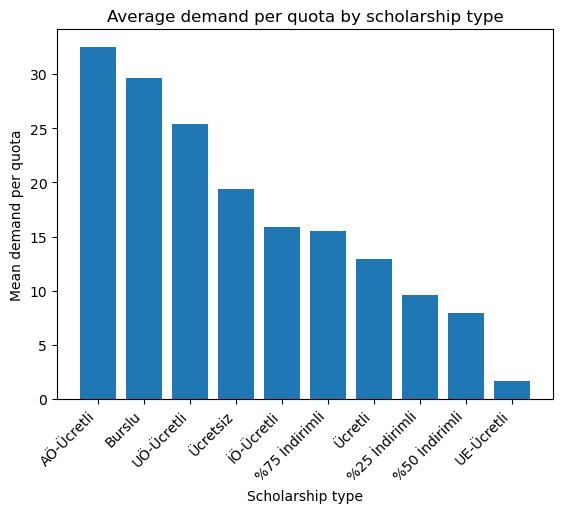

In [21]:
demand_by_sch = (
    df_core.groupby("scholarship_type")["demand_per_quota"]
    .agg(["mean","median","std","count"])
    .sort_values("mean", ascending=False)
)

display(demand_by_sch)

plt.figure()
plt.bar(demand_by_sch.index, demand_by_sch["mean"])
plt.title("Average demand per quota by scholarship type")
plt.xlabel("Scholarship type")
plt.ylabel("Mean demand per quota")
plt.xticks(rotation=45, ha="right")
plt.show()


## Scholarship type and demand

Interpretation prompts:
- Which scholarship categories have systematically higher demand per quota?
- Are some categories based on very small sample sizes?
- What might explain higher demand for “Burslu” vs “Ücretli” vs “Ücretsiz” programs?
- Do any results look counterintuitive or potentially data-driven (e.g., quota denominators)?

TODO: write your explanation using the table + bar chart.


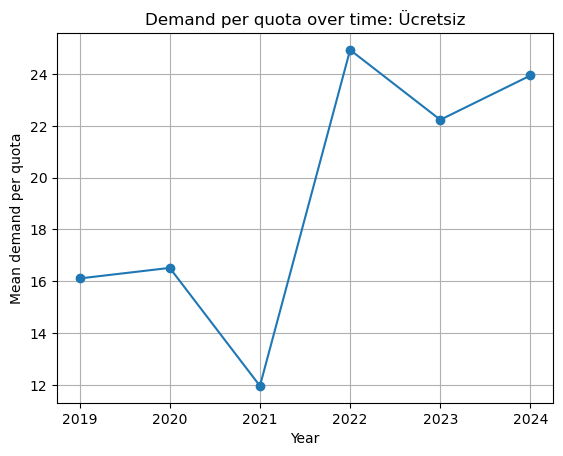

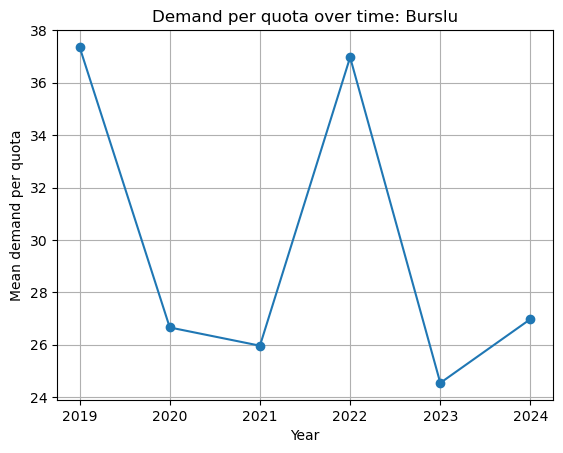

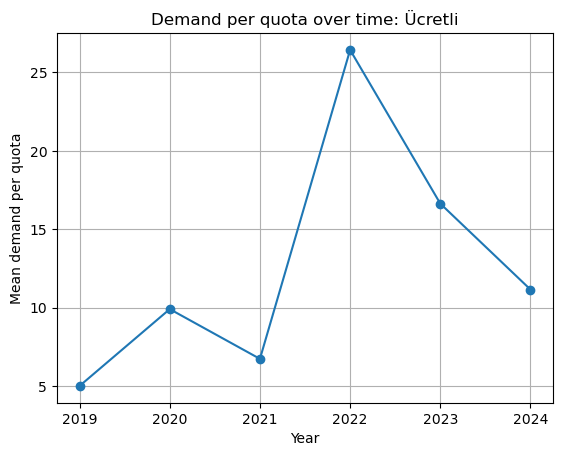

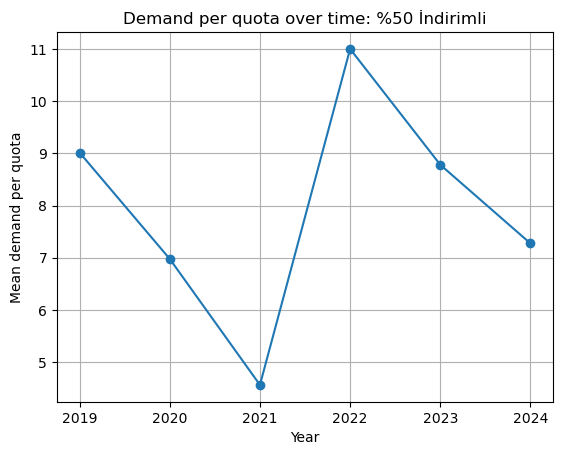

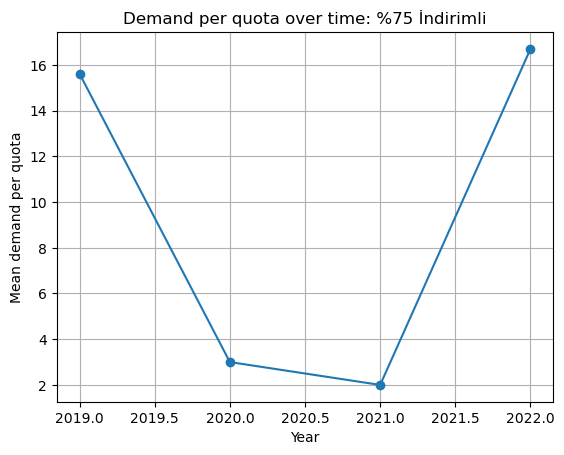

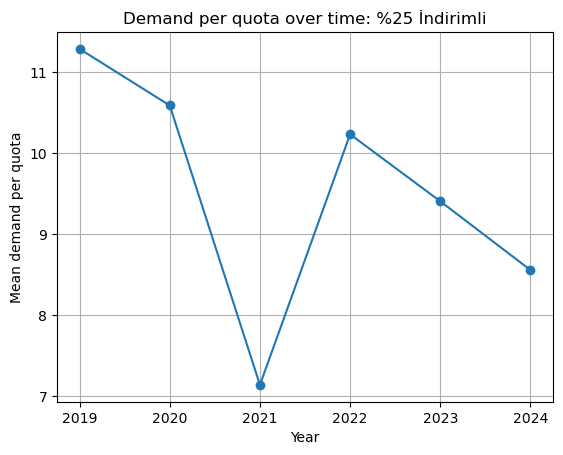

In [18]:
demand_by_sch_year = (
    df_core.groupby(["year", "scholarship_type"])["demand_per_quota"]
    .mean()
    .reset_index()
)

main_sch = ["Ücretsiz","Burslu","Ücretli","%50 İndirimli","%75 İndirimli","%25 İndirimli"]
trend = demand_by_sch_year[demand_by_sch_year["scholarship_type"].isin(main_sch)]

for sch in main_sch:
    sub = trend[trend["scholarship_type"] == sch]
    plt.figure()
    plt.plot(sub["year"], sub["demand_per_quota"], marker="o")
    plt.title(f"Demand per quota over time: {sch}")
    plt.xlabel("Year")
    plt.ylabel("Mean demand per quota")
    plt.grid(True)
    plt.show()


## Demand trends over time by scholarship

Interpretations:
- Which scholarship types show rising vs falling demand across 2019–2024?
- Are there years with spikes/drops across several categories (possible macro effects)?
- Are some scholarships missing after certain years (data sparsity)? If so, note it.

TODO: summarise patterns carefully without claiming causality.


,mean,median,std,count
score_type,,,,
TYT,20.583660,15.1,24.217304,60030
SAY,17.986923,13.3,21.820423,29916
SÖZ,16.694727,12.8,16.218540,12288
EA,16.457743,13.1,17.092701,22245
DİL,15.723754,12.5,15.230528,3873


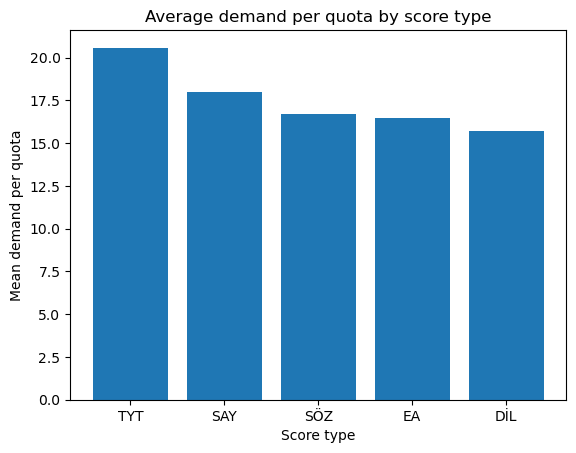

In [25]:
demand_by_score = (
    df_core.groupby("score_type")["demand_per_quota"]
    .agg(["mean","median","std","count"])
    .sort_values("mean", ascending=False)
)
display(demand_by_score)

plt.figure()
plt.bar(demand_by_score.index, demand_by_score["mean"])
plt.title("Average demand per quota by score type")
plt.xlabel("Score type")
plt.ylabel("Mean demand per quota")
plt.show()


In [26]:
interaction = (
    df_core.groupby(["scholarship_type","score_type"])["demand_per_quota"]
    .mean()
    .reset_index()
    .pivot(index="scholarship_type", columns="score_type", values="demand_per_quota")
)

display(interaction)


score_type,DİL,EA,SAY,SÖZ,TYT
scholarship_type,,,,,
%25 İndirimli,4.568116,10.727009,9.580299,4.992466,10.200203
%50 İndirimli,5.870732,7.860192,8.671183,5.169680,8.352388
%75 İndirimli,17.759259,10.477916,13.811839,11.196891,19.019604
AÖ-Ücretli,NaN,20.102165,42.500000,12.872549,40.057853
Burslu,26.931392,25.962723,28.749909,25.190350,33.692456
UE-Ücretli,NaN,3.125000,1.033333,NaN,NaN
UÖ-Ücretli,7.700000,17.052632,10.925000,14.487500,27.043636
Ücretli,7.790496,12.516007,11.835529,8.378660,16.423454
Ücretsiz,16.640770,17.037615,18.307814,19.442045,20.898247


## Score type effects and interaction with scholarship

Interpretations:
- Which score routes (TYT/SAY/EA/SÖZ/DİL) show higher demand on average?
- Does scholarship amplify or reduce those differences?
- Example wording: “Within SAY programs, Burslu demand is ___ relative to Ücretli…”

TODO: write more on interpretation using the bar chart + interaction table.


,program_code,year,total_quota,total_enrolled,total_preferences,demand_per_quota,initial_placement_rate,placed_count,final_score_012,final_rank_012,final_score_018,final_rank_018,male,female
program_code,1.000000,-0.001860,-0.140013,-0.145934,-0.153990,-0.065537,-0.228252,-0.145760,0.070670,-0.082069,0.007726,0.027286,-0.161601,-0.120471
year,-0.001860,1.000000,0.006184,0.014743,0.054445,0.085828,0.110274,0.015052,0.116862,0.121582,0.209082,0.176753,0.007049,0.019004
total_quota,-0.140013,0.006184,1.000000,0.988859,0.555717,-0.004417,0.051114,0.975492,-0.023089,0.033399,-0.017669,-0.005827,0.891553,0.935608
total_enrolled,-0.145934,0.014743,0.988859,1.000000,0.580368,0.009095,0.094563,0.985998,-0.015769,0.036679,-0.017551,-0.005878,0.901748,0.945281
total_preferences,-0.153990,0.054445,0.555717,0.580368,1.000000,0.220634,0.088070,0.588050,0.044587,-0.001191,0.072304,-0.073667,0.534063,0.566314
demand_per_quota,-0.065537,0.085828,-0.004417,0.009095,0.220634,1.000000,0.281557,0.010499,0.313973,-0.199845,0.419824,-0.324230,-0.001146,0.017385
initial_placement_rate,-0.228252,0.110274,0.051114,0.094563,0.088070,0.281557,1.000000,0.085474,0.103034,0.080141,-0.079529,0.006996,0.088492,0.074916
placed_count,-0.145760,0.015052,0.975492,0.985998,0.588050,0.010499,0.085474,1.000000,-0.012574,0.030000,-0.013294,-0.007778,0.912227,0.960290
final_score_012,0.070670,0.116862,-0.023089,-0.015769,0.044587,0.313973,0.103034,-0.012574,1.000000,-0.721584,0.979600,-0.786491,-0.025615,-0.002074
final_rank_012,-0.082069,0.121582,0.033399,0.036679,-0.001191,-0.199845,0.080141,0.030000,-0.721584,1.000000,-0.803319,0.844271,0.051258,0.011835


,program_code,year,total_quota,total_enrolled,total_preferences,demand_per_quota,initial_placement_rate,placed_count,final_score_012,final_rank_012,final_score_018,final_rank_018,male,female
program_code,1.000000,0.017811,-0.549776,-0.532514,-0.532275,-0.127346,-0.173780,-0.525324,0.094826,-0.104447,0.034364,-0.028251,-0.512130,-0.418127
year,0.017811,1.000000,0.039660,0.071166,0.152238,0.172157,-0.020875,0.075899,0.143803,0.090145,0.243507,0.159583,0.035568,0.095830
total_quota,-0.549776,0.039660,1.000000,0.950079,0.743822,0.019696,0.242349,0.936575,-0.050775,0.070072,0.057191,-0.059561,0.785318,0.802637
total_enrolled,-0.532514,0.071166,0.950079,1.000000,0.819615,0.161568,0.445344,0.985719,-0.016166,0.078318,0.057877,-0.060302,0.828001,0.853713
total_preferences,-0.532275,0.152238,0.743822,0.819615,1.000000,0.620832,0.479025,0.835993,0.232156,-0.064657,0.393426,-0.262500,0.682825,0.753790
demand_per_quota,-0.127346,0.172157,0.019696,0.161568,0.620832,1.000000,0.455756,0.181372,0.520065,-0.280138,0.653037,-0.462513,0.085905,0.208701
initial_placement_rate,-0.173780,-0.020875,0.242349,0.445344,0.479025,0.455756,1.000000,0.427460,-0.001991,0.086062,-0.154967,0.003142,0.365054,0.404995
placed_count,-0.525324,0.075899,0.936575,0.985719,0.835993,0.181372,0.427460,1.000000,0.003277,0.049483,0.089006,-0.070143,0.840129,0.867979
final_score_012,0.094826,0.143803,-0.050775,-0.016166,0.232156,0.520065,-0.001991,0.003277,1.000000,-0.824973,0.982222,-0.792364,-0.107546,0.037851
final_rank_012,-0.104447,0.090145,0.070072,0.078318,-0.064657,-0.280138,0.086062,0.049483,-0.824973,1.000000,-0.807035,0.832979,0.148792,-0.009570


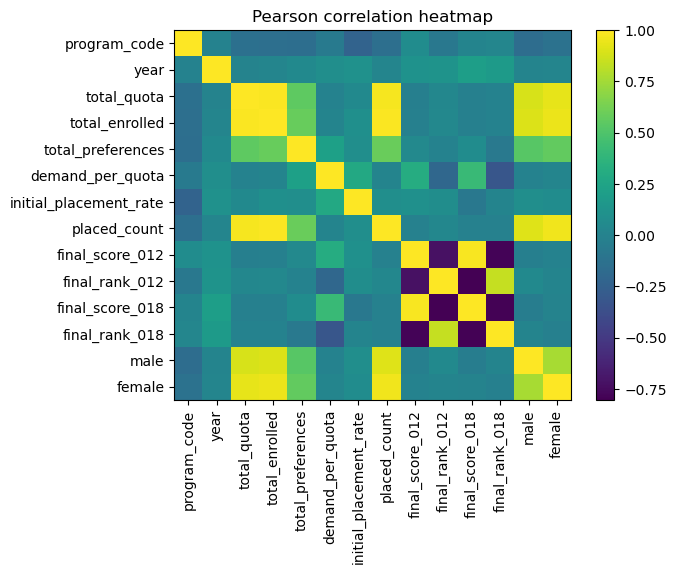

In [28]:
corr_pearson = num_df.corr(method="pearson")
corr_spearman = num_df.corr(method="spearman")

display(corr_pearson)
display(corr_spearman)

plt.figure()
plt.imshow(corr_pearson, aspect="auto")
plt.colorbar()
plt.title("Pearson correlation heatmap")
plt.xticks(range(len(corr_pearson.columns)), corr_pearson.columns, rotation=90)
plt.yticks(range(len(corr_pearson.columns)), corr_pearson.columns)
plt.show()


In [29]:
corr_pairs = corr_pearson.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
top_pairs = corr_pairs.head(5)
top_pairs


total_enrolled   total_quota        0.988859
total_quota      total_enrolled     0.988859
total_enrolled   placed_count       0.985998
placed_count     total_enrolled     0.985998
final_score_018  final_score_012    0.979600
dtype: float64

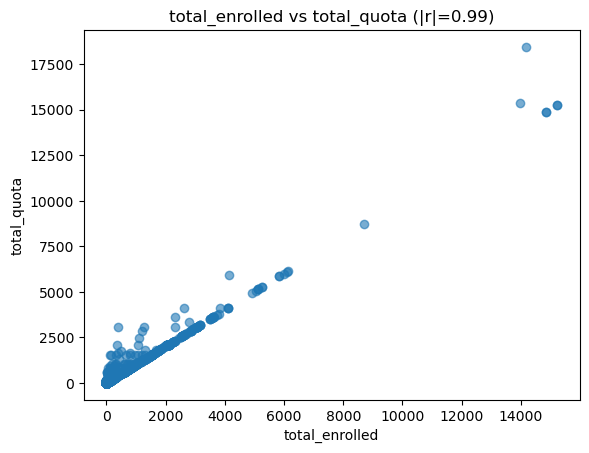

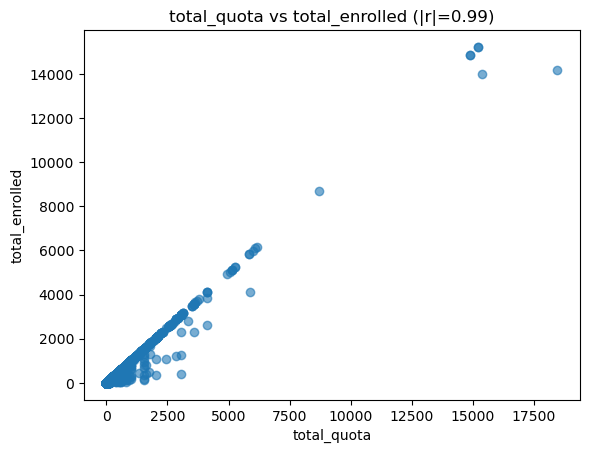

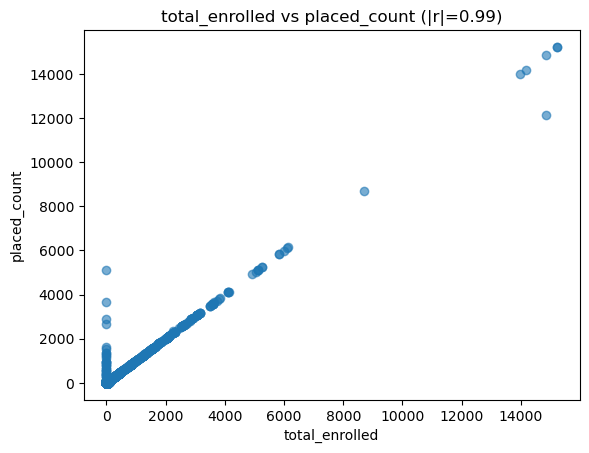

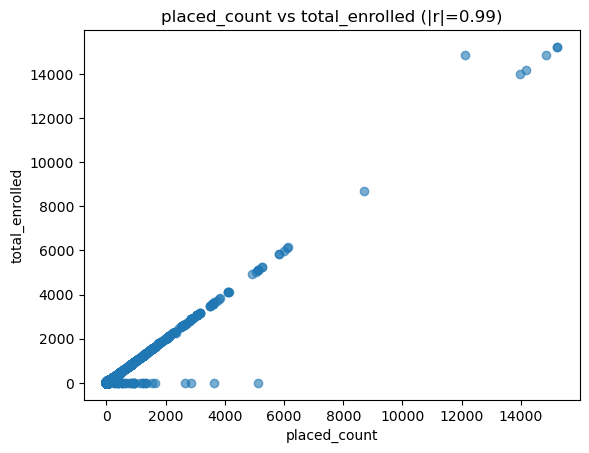

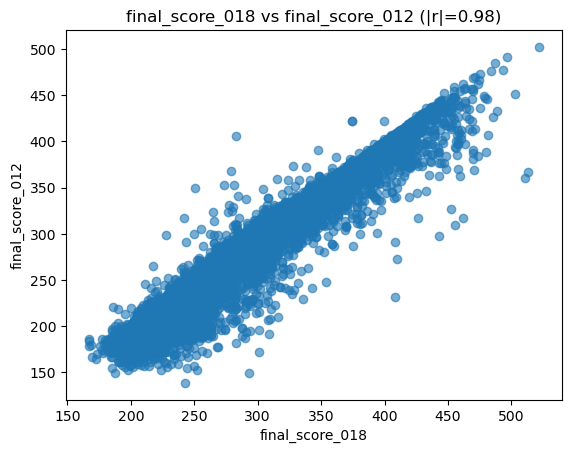

In [30]:
for (x, y), val in top_pairs.items():
    plt.figure()
    plt.scatter(df_core[x], df_core[y], alpha=0.6)
    plt.title(f"{x} vs {y} (|r|={val:.2f})")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


## Relationship insights (fill after running)

Pick 2–3 meaningful relationships, e.g.:
- demand_per_quota vs total_preferences
- demand_per_quota vs final_rank_012
- placement_rate vs demand_per_quota

Interpretation prompts:
- direction and strength of association
- plausible reasons (competition, student behaviour, quota strategy)
- confounders to note
- explicitly: “correlation ≠ causation”

TODO: write your interpretation.


city
ESKİŞEHİR    29.776429
BURSA        22.052569
ANKARA       21.836819
AMASYA       21.713428
MUĞLA        21.444404
BAYBURT      21.365060
BALIKESİR    21.307849
HAKKARİ      21.098058
YOZGAT       20.987163
İSTANBUL     20.588939
SİNOP        20.492906
BOLU         20.487055
SAMSUN       20.429070
ANTALYA      20.370963
ARTVİN       20.210973
Name: demand_per_quota, dtype: float64

count    82.000000
mean     18.192723
std       2.710300
min       7.200472
25%      16.578307
50%      18.182964
75%      19.808068
max      29.776429
Name: demand_per_quota, dtype: float64

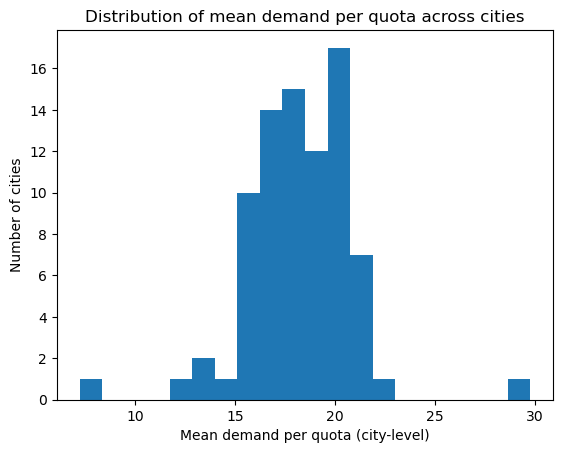

In [32]:
city_demand = (
    df_core.groupby("city")["demand_per_quota"]
    .mean()
    .sort_values(ascending=False)
)

display(city_demand.head(15))
display(city_demand.describe())

plt.figure()
plt.hist(city_demand, bins=20)
plt.title("Distribution of mean demand per quota across cities")
plt.xlabel("Mean demand per quota (city-level)")
plt.ylabel("Number of cities")
plt.show()


## City-level patterns

Interpretations:
- Which cities sit consistently above/below the national city mean?
- Is the spread narrow or wide? What might that imply about regional opportunity?
- Could results be driven by a few elite universities in certain cities?

TODO: interpret cautiously and relate back to the central question, keep tight.


## Limitations

**Data limitations**
- Some competitiveness variables (e.g., final_score_018/final_rank_018) may be missing heavily or year-specific.
- Scholarship categories like AÖ/UÖ/UE/İÖ may have small counts → unstable averages.
- Demand_per_quota depends on quota quality and reporting — not purely preference.

**Analytical limitations**
- EDA only: no causal claims.
- Aggregation may hide within-department or within-university heterogeneity.
- City comparisons may reflect composition differences (which programs exist there).

TODO: add any dataset-specific issues encountered.


## Conclusion

TODO:
- 3–5 bullet summary of the key findings on scholarship, score type, and trends.
- Describe why these matter for student choice and admissions competitiveness.
- What additional data/analysis would help answer the question more strongly?
